In [2]:
# Hull-White One-Factor Model vgl. engl. Wikipedia
# dX[t] = (theta[t] + a * X[t])*dt + sigma dW[t])
#hier simulieren wir erstmal nur X_t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


def simulate_Hull_White_One_Factor(r0: float , a: float, sigma: float, T,N, f) ->pd.DataFrame:
    def const_forwards(value: float, N: int) -> np.array:
      
      return np.full(N, value)

    def timepoints(T: int, N: int) -> np.array:
      """
      Diskretisierung
      """
      return np.linspace(0, T, N)
    
    
#Initialisierung der Variablen
    t = timepoints(T, N)
    f_1 = const_forwards(f, N)
    e = np.zeros(N)
    v = np.zeros(N)
    r = np.ones(N) * r0
    theta = f_1 + (sigma**2/(2*(-a)))*(1-np.exp(2*a*t))
    for el in range(1, N):
      deltat = t[el] - t[el-1] #Zeitdifferenz
      e[el] = r[el-1] * np.exp(-a*deltat) + theta[el] - theta[el-1] * np.exp(-a*deltat) #Erwartungswert der Normalverteilung
      v[el] = sigma**2/(2*a) * (1 - np.exp(-2*a*deltat)) #Varianz der Normalverteilung
      r[el] = np.random.normal(e[el], np.sqrt(v[el])) #Zufallsvariable r_t \sim N(e_t, v_t) nach Wikipedia

    
    dict = {'Time' : t, 'Interest Rate' : r}
    interest_rate_simulation = pd.DataFrame.from_dict(data = dict)
    interest_rate_simulation.set_index('Time', inplace = True)
    return interest_rate_simulation
     

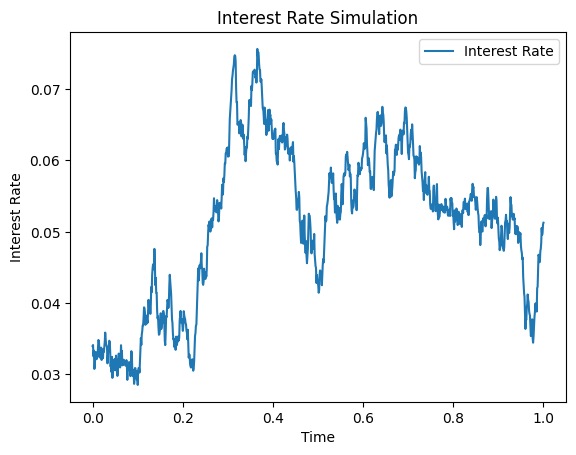

/tmp/ipykernel_6525/3042515118.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  int = simps(rt['Interest Rate'], rt.index)
/tmp/ipykernel_6525/3042515118.py:45: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)


bank account: 1.0523654816716603


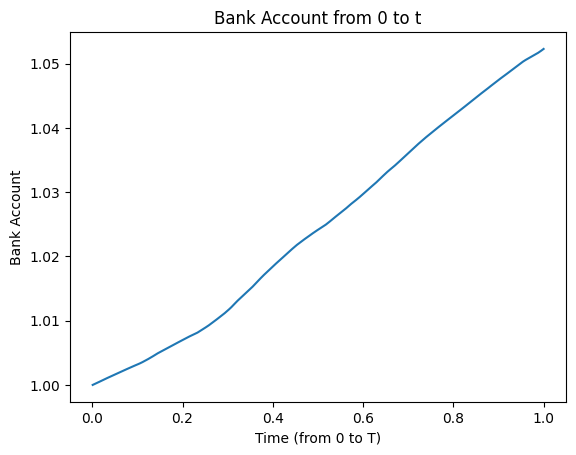

Final bond price: 0.9502889454249116


In [3]:
#Hier simulieren wir 2 Zinskurven für verschiedene Parameter 
#fixing the Parameters
#theta= f_1 + sigma**2/(-a)*(1-np.exp(-a*2*t))
T=1
f_1=0.10
sigma = 0.2 
alpha = 0.05 #=a in der Notation von Wikipedia
X0 = 0.02
l = 0.03
lamda= 0.2
N=1000

rt = l + lamda * simulate_Hull_White_One_Factor(X0, alpha, sigma, T, N, f_1)

# Plot the interest rate simulation
rt.plot()
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Simulation')
plt.show()


from scipy.integrate import simps

# Compute the integral of the interest rates
int = simps(rt['Interest Rate'], rt.index)

# Compute bank account
result = np.exp(int)
print(f"bank account: {result}")


bank_account = []
bond_prices = []

time_points = np.linspace(0, T, N)  # Generate time points from 0 to T_new

for t_idx in range(1, len(time_points)):
    # Slice up to the current time index
    cut_out_new = rt.iloc[:t_idx]
    y_values = cut_out_new['Interest Rate']
    x_values = time_points[:t_idx]  # Ensure x-values match the sliced data
    
    # Compute the integral of interest rates
    integral = simps(y_values, x_values)
    
    # Compute bond price as exp(-integral)
    bank = np.exp(integral)
    bond = np.exp(-integral)
    


   
    bank_account.append(bank)
    bond_prices.append(bond)
    
# Plot the bond prices over time
plt.plot(time_points[1:], bank_account)
plt.xlabel('Time (from 0 to T)')
plt.ylabel('Bank Account')
plt.title('Bank Account from 0 to t')
plt.show() 




def final_bond(bond_prices):
    return bond_prices[-1]

bond_simulated = final_bond(bond_prices)
print(f"Final bond price: {bond_simulated}")


Bank_Account:1.0877875407356297


/tmp/ipykernel_6525/3523872708.py:14: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_new = simps(out_new['Interest Rate'], out_new.index)


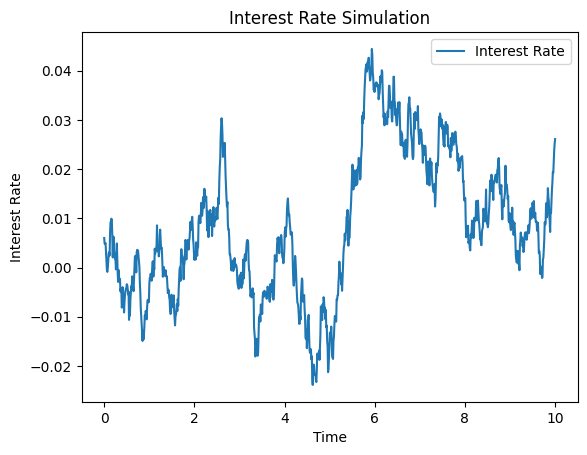

/tmp/ipykernel_6525/3523872708.py:42: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)


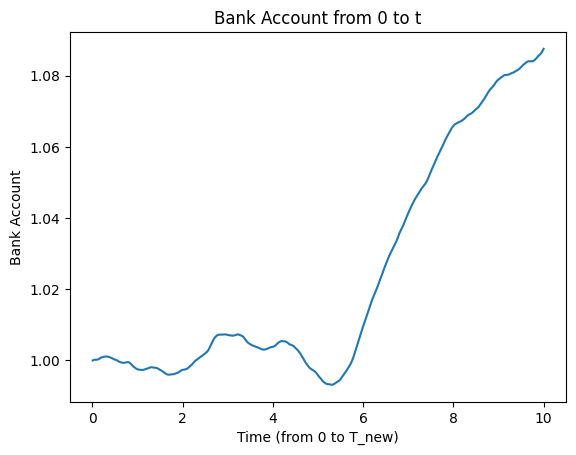

In [4]:
from scipy.integrate import simps

T_new=10
f_new=0.10
sigma_new = 0.1
beta_new = 0.05
X0_new = 0.03
l_new = 0
lbd_new = 0.2
N_new=1000

out_new = l_new + lbd_new * simulate_Hull_White_One_Factor(X0_new, beta_new, sigma_new, T_new, N_new, f_new)
# Compute the integral of the interest rates
integral_new = simps(out_new['Interest Rate'], out_new.index)

# Compute e^(-integral)
result_new = np.exp(integral_new)
print(f"Bank_Account:{result_new}")


# Plot the interest rate simulation
out_new.plot()
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Simulation')
plt.show()


bank_account = []
spot_rates = []
forward_rates = []
time_points = np.linspace(0, T_new, N_new)  # Generate time points from 0 to T_new

for t_idx in range(1, len(time_points)):
    # Slice up to the current time index
    cut_out_new = out_new.iloc[:t_idx]
    
    y_values = cut_out_new['Interest Rate']
    x_values = time_points[:t_idx]  # Ensure x-values match the sliced data
    
    # Compute the integral of interest rates
    integral = simps(y_values, x_values)
    
    # Compute bond price as exp(-integral)
    banks = np.exp(integral)
    
    bank_account.append(banks)
    spots = integral / time_points[t_idx]
    forwards = 1/time_points[t_idx]*(np.log(1/banks))

    spot_rates.append(spots)
    
    forward_rates.append(forwards)


# Plot the bond prices over time
plt.plot(time_points[1:], bank_account)
plt.xlabel('Time (from 0 to T_new)')
plt.ylabel('Bank Account')
plt.title('Bank Account from 0 to t')
plt.show()



Beobachtung des (verzweifelten) Studenten: l muss größer sigma gewählt werden sonst macht das Modell groben Unfug! 

Bond Price: 0.8874151327078134


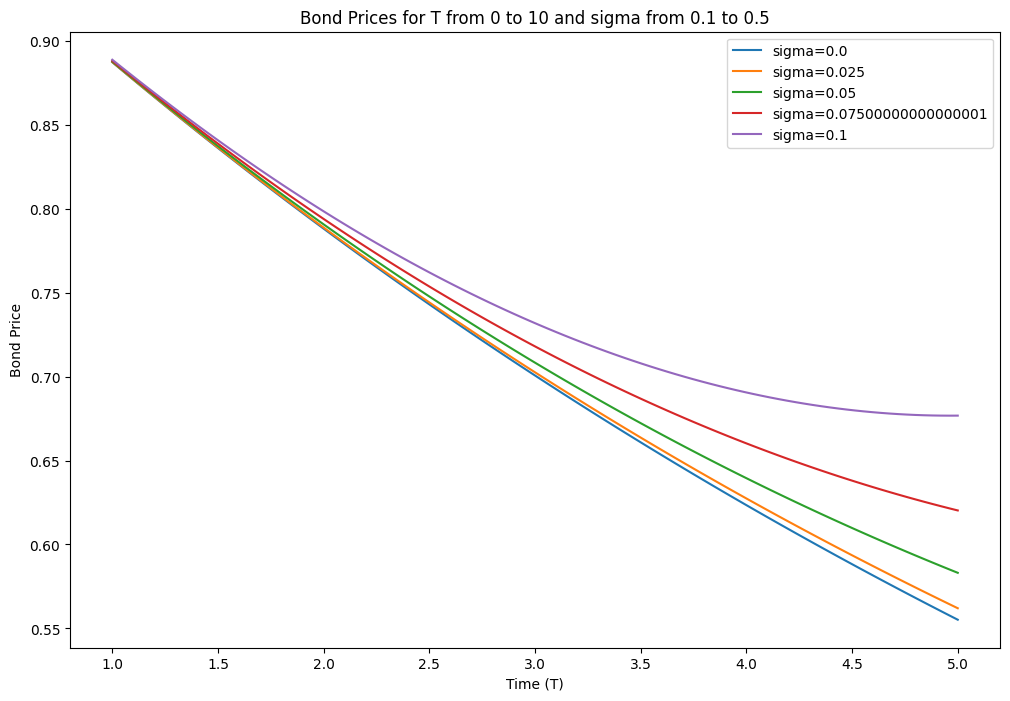

In [5]:
#Mithilfe des Harms-Paper widmen wir uns den Bondpreisen und der Forward Rate

#Die Lösungen/Parameter der Riccati-DGL nehmen wir aus Sektion 5  
from scipy import integrate

T=1
f_1=0.10
sigma = 0.02
beta = -0.05
X_0 = 0.02
l = 0.1
lamda= 1
N=1000

def bond_price(T, l, beta, sigma, X_0, f_1):
    def PHI_y(t, sigma, beta):
        return (sigma**2 / (4 * beta**3)) * (2 * beta * t - 4 * np.exp(beta * t) + 3 + np.exp(2 * beta * t))

    def PSI_y(t, beta):
        return (1 / beta) * (1 - np.exp(beta * t))

    def theta(sigma, beta, t, f_1):
        return f_1 + (sigma**2 / (2 * -1*beta)) * (1 - np.exp(2*beta * t))

    def integrand(s, T, sigma, beta, f_1):
        return theta(sigma, beta, s, f_1) * PHI_y(T - s, sigma, beta)
    
    integral = integrate.quad(lambda s: integrand(s, T, sigma, beta, f_1), 0, T)
    a = -l * T
    b = PHI_y(T, sigma, beta)
    c = PSI_y(T, beta) * X_0
    bond1 = np.exp(a + b + c + integral[0])
    return bond1

bond1 = bond_price(T, l, beta , sigma, X_0, f_1)
print(f"Bond Price: {bond1}")

# Plot the bond prices for T from 0 to 10 and sigma from 0.1 to 0.5
T_values = np.linspace(1, 5, 100)
sigma_values = np.linspace(0, 0.1, 5)

plt.figure(figsize=(12, 8))

for sigma in sigma_values:
    bond_prices = [bond_price(T, l, beta, sigma, X_0, f_1) for T in T_values]

    plt.plot(T_values, bond_prices, label=f'sigma={sigma}')

plt.xlabel('Time (T)')
plt.ylabel('Bond Price')
plt.title('Bond Prices for T from 0 to 10 and sigma from 0.1 to 0.5')
plt.legend()
plt.show()

forward rate:0.09045153038357925


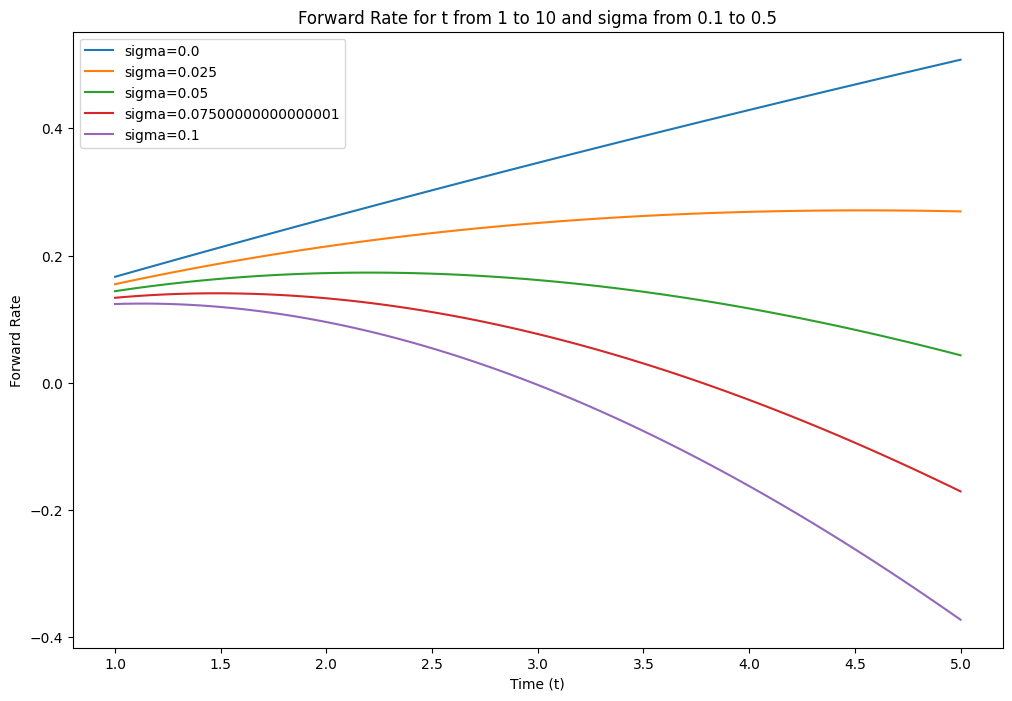

In [6]:


T=1
f_1=0.10
sigma = 0.2 
beta = -0.05
X_0 = 0.02
l = 0.05
lamda= 0.2
N=1000

def forward_rate(T, l, beta , sigma, X_0,f_1):
    def phi_y_derivative(t: float, sigma: float, beta: float) -> float:
        """
        Compute the derivative of Phi_y(t).
        """
        term1 = 2 
        term2 = -4 * np.exp(beta * t)
        term3 = 2 * np.exp(2 * beta * t)
        return (sigma / (4 * beta**2)) * (term1 + term2 + term3)

    def psi_y_derivative(t: float, beta: float) -> float:
        """
        Compute the derivative of Psi_y(t).
        """
        return -np.exp(beta * t)

    def theta(sigma, beta, t, f_1):
        return f_1 + (sigma**2 / (2 * -beta)) * (1 - np.exp(2*beta * t))
    
    def integrand(T,s,beta, sigma,f_1):
        return theta(sigma, beta, s, f_1) * psi_y_derivative(T - s, beta)

    integral_result = integrate.quad(lambda s: integrand(T, s, beta, sigma,f_1), 0, T)
   
    result = (l - integral_result[0] - phi_y_derivative(T, sigma, beta) - psi_y_derivative(T, beta)* X_0)
    return result
result = forward_rate(T, l, beta, sigma, X_0, f_1)
print(f"forward rate:{result}")

# Plot the forward rate for t from 1 to 10 and sigma from 0.1 to 0.5
t_values = np.linspace(1, 5, 100)
sigma_values = np.linspace(0, 0.1, 5)

plt.figure(figsize=(12, 8))

for sigma in sigma_values:
    forward_rates = [forward_rate(t, l, beta, sigma, X_0, f_1) for t in t_values]
    plt.plot(t_values, forward_rates, label=f'sigma={sigma}')

plt.xlabel('Time (t)')
plt.ylabel('Forward Rate')
plt.title('Forward Rate for t from 1 to 10 and sigma from 0.1 to 0.5')
plt.legend()
plt.show()

Nach Section 3.6 entspricht $\mu_{HJM}=\psi*\sigma^2*\psi'$  und $\sigma_{HJM}=-\sigma*\psi'$ dies beschreibt die Dynamik der Forward Rate 

In [7]:
#Analytische Lösung für den Call-Preis

T=1
f_1=0.10
sigma = 0.2 
beta = -0.05

X_0 = 0.02
l = 0
lamda= 1
N=10
K=0.3


from scipy.stats import norm

def phi_y_derivative(t: float, sigma: float, beta: float) -> float:
        term1 = 2 
        term2 = -4 * np.exp(beta * t)
        term3 = 2 * np.exp(2 * beta * t)
        return (sigma / (4 * beta**2)) * (term1 + term2 + term3)
sigma_1= integrate.quad(lambda s: -beta*phi_y_derivative(s, sigma, beta), 0, T)[0]
sigma_HJM = integrate.quad(lambda s: sigma_1**2, 0, T)[0]







d_1 = (np.log(bond_price(T, l, beta, sigma, X_0, f_1)/K)+ 0.5*sigma_HJM)/(np.sqrt(sigma_HJM))
d_2= (np.log(bond_price(T, l, beta, sigma, X_0, f_1)/K)- 0.5*sigma_HJM)/(np.sqrt(sigma_HJM))

call_option_price= bond_price(T,l,beta,sigma,X_0,f_1)*norm.cdf(d_1)-K*norm.cdf(d_2)
print(f" analytic call option price: {call_option_price}")




 analytic call option price: 0.6871717136040376


In [8]:
#;Monte Carlo Simulation

def final_value(bond_prices):
    return bond_prices[-1]

call_option_value= np.maximum((bond_price(T, l, beta, sigma, X_0, f_1)- K),0) #Wieso stimmt das mit der analytischen Lösung überein?
print(f"call_option_value: {call_option_value}")


num_simulations = 10
bond_prices_simulated = []

for _ in range(num_simulations):
    rt_simulated = l + lamda * simulate_Hull_White_One_Factor(X0, alpha, sigma, T, N, f_1)
    bond_simulated = []

    for t_idx in range(1, N):
        cut_out_new = rt_simulated.iloc[:t_idx]
        y_values = cut_out_new['Interest Rate']
        x_values = time_points[:t_idx]
        
        # Ensure x_values and y_values have the same length 
        if len(x_values) != len(y_values):
            x_values = x_values[:len(y_values)]

        integral = simps(y_values, x_values)
        bond = np.exp(-integral)
        bond_simulated.append(bond)

    bond_simulated_final = final_bond(bond_simulated)
    bond_prices_simulated.append(bond_simulated_final)
    call_value_simulated = np.maximum((bond_simulated_final - K), 0)

# Calculate the mean bond price
mean_bond_price = np.mean(bond_prices_simulated)
print(f"Mean Bond Price: {mean_bond_price}")
monte_carlo_option_price= np.maximum((mean_bond_price- K),0) #Das sollte uns eigentlich nicht das richtige Ergebnis liefern
print(f"Monte Carlo Call Option Price: {monte_carlo_option_price}")
average_call_option_value = np.mean(call_value_simulated)
print(f"Average Call Option Value: {average_call_option_value}") #Das sollt das richtige Ergebnis liefern
print((bond_price(T, l, beta, sigma, X_0, f_1)))



call_option_value: 0.6871717136040376
Mean Bond Price: 0.9974477258842838
Monte Carlo Call Option Price: 0.6974477258842837
Average Call Option Value: 0.6923343030988123
0.9871717136040375


/tmp/ipykernel_6525/1656976661.py:29: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)
